# Title
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [1]:
import sklearn
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.display import HTML

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
sns.set()
r_seed = 37

## Load dataset

In [5]:
f_database = r'../../data/processed/microscopic_imgs/cropped_clean/db'
Print_Database= pd.read_csv(f_database+"/"+'Print_Database_ML.csv',index_col=[0])

df_raw_input = pd.read_csv(f_database+"/"+'JS_A191_dataset_2023_4_4.tsv',index_col=None, delimiter='\t')

In [6]:
df_raw_input.drop('Unnamed: 26', axis=1, inplace=True)

In [7]:
df_raw_input.columns

Index(['Date Completed / Initials', '  Print ID #', 'Printhead ID #',
       'Line Width (um)', 'Substrate Thickness (um)', 'Cartridge Print Height',
       'Nozzle Voltage', 'Drop Spacing (um)', 'Nozzle #',
       'Jetting Frequency (kHz)',
       'Distance      Time      Velocity    (um)           (us)         (m/s) ',
       'Unnamed: 11', 'Unnamed: 12', 'Notes', 'Platen  Temperature',
       'Cartridge Temperature', 'Waveform', 'Number of Layers',
       'Ink  Viscosity (cP) (η)', 'Ink  Viscosity (Pa.s) (η)',
       'Surface  Tension (dyne/cm) (γ)', 'Surface Tension (N/m) (γ)',
       'ink  density (ρ=g/L)', 'Nozzle  Diameter (um)', 'Particle size (nm)',
       'z-Number  ( √γρD/ η )', 'line_width', 'roughness', 'Splash',
       'Thickness', 'conductivity'],
      dtype='object')

In [8]:
df_raw_input.rename(columns={'Date Completed / Initials':'initials',  '  Print ID #': 'print_id', 'Printhead ID #': 'print_head_id',
                            'Line Width (um)': 'line_width', 'Substrate Thickness (um)': 'substrate_thickness',
                            'Cartridge Print Height': 'cartridge_print_height', 'Nozzle Voltage': 'nozzle_voltage',
       'Drop Spacing (um)': 'drop_spacing', 'Nozzle #': 'nozzle_id', 'Jetting Frequency (kHz)': 'jetting_freq',
       'Distance      Time      Velocity    (um)           (us)         (m/s) ': 'distance',
       'Unnamed: 11': 'time', 'Unnamed: 12':'velocity', 'Notes': 'notes', 'Platen  Temperature' : 'platen_temperature',
       'Cartridge Temperature': 'cartridge_temperature', 'Waveform': 'waveform', 'Number of Layers': 'no_of_layers',
       'Ink  Viscosity (cP) (η)': 'ink_visc0_cp', 'Ink  Viscosity (Pa.s) (η)': 'ink_visco_pas',
       'Surface  Tension (dyne/cm) (γ)': 'surface_tension_dyne_cm', 'Surface Tension (N/m) (γ)': 'surface_tension_n_m',
       'ink  density (ρ=g/L)': 'ink _density', 'Nozzle  Diameter (um)': 'nozzle_diameter', 'Particle size (nm)' : 'particle_size',
       'z-Number  ( √γρD/ η )': 'z_number', ' Printed  line width': 'line_width', 'roughness': 'roughness', 'Splash': 'splash',
       'Thickness': 'thickness', 'conductivity': 'conductivity'}, inplace=True)

Print_Database.rename(columns={'Print ID': 'print_id'}, inplace=True)

In [9]:
df_raw_input.drop(['line_width', 'roughness', 'splash', 'thickness', 'conductivity'], axis=1, inplace=True)

In [18]:
df_raw_input[df_raw_input['print_id'] == '6b']

,initials,print_id,print_head_id,substrate_thickness,cartridge_print_height,nozzle_voltage,drop_spacing,nozzle_id,jetting_freq,distance,...,waveform,no_of_layers,ink_visc0_cp,ink_visco_pas,surface_tension_dyne_cm,surface_tension_n_m,ink _density,nozzle_diameter,particle_size,z_number
60,03.21.22 / A.T,6b,281744.0028.4621.01,200,750,25,13,11.0,5,300,...,samba waveform_Fataneh 3-3-22,1,6.9,0.0069,32.3,0.0323,1614,21.5,36,4.852027


In [17]:
df_raw_input['print_id'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '6b'

In [14]:
pd.merge(Print_Database, df_raw_input, on='print_id',how='left')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [13]:
Print_Database['Print ID']

0        1
1        2
2        3
3        4
4        5
      ... 
200    205
201    206
202    207
203    209
204    210
Name: Print ID, Length: 205, dtype: int64

# Existing Methods [MLPRegressor]

## EDA

In [18]:
# https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/ 
df_raw_input.describe()

,Line Width (um),Substrate Thickness (um),Cartridge Print Height,Nozzle Voltage,Drop Spacing (um),Nozzle #,Jetting Frequency (kHz),Distance Time Velocity (um) (us) (m/s),Unnamed: 11,Unnamed: 12,...,Surface Tension (N/m) (γ),ink density (ρ=g/L),Nozzle Diameter (um),Particle size (nm),z-Number ( √γρD/ η ),Printed line width,roughness,Splash,Thickness,conductivity
count,378.0,378.0,378.000000,378.000000,378.000000,368.000000,378.0,378.000000,368.000000,368.000000,...,378.000000,378.000000,378.0,378.000000,378.000000,0.0,0.0,0.0,0.0,0.0
mean,150.0,200.0,679.232804,32.412698,12.449735,7.644022,5.0,771.269841,75.119565,10.239868,...,0.032063,1566.476190,21.5,36.285714,4.919960,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,86.018281,5.092153,2.877492,2.086917,0.0,246.835626,23.606489,2.459704,...,0.000507,45.471135,0.0,0.700782,0.193521,NaN,NaN,NaN,NaN,NaN
min,150.0,200.0,550.000000,25.000000,8.000000,2.000000,5.0,270.000000,31.000000,5.660377,...,0.030900,1517.000000,21.5,36.000000,4.717899,NaN,NaN,NaN,NaN,NaN
25%,150.0,200.0,600.000000,28.000000,10.000000,6.000000,5.0,900.000000,60.750000,8.333333,...,0.032200,1526.000000,21.5,36.000000,4.852027,NaN,NaN,NaN,NaN,NaN
50%,150.0,200.0,700.000000,31.000000,12.000000,8.000000,5.0,900.000000,78.000000,10.112180,...,0.032300,1526.000000,21.5,36.000000,4.852027,NaN,NaN,NaN,NaN,NaN
75%,150.0,200.0,750.000000,37.000000,15.000000,9.000000,5.0,900.000000,90.000000,11.881579,...,0.032300,1614.000000,21.5,36.000000,5.039074,NaN,NaN,NaN,NaN,NaN
max,150.0,200.0,800.000000,40.000000,17.000000,12.000000,5.0,900.000000,159.000000,15.517241,...,0.032300,1614.000000,21.5,38.000000,5.328373,NaN,NaN,NaN,NaN,NaN


In [12]:
#Print_Database.boxplot()

sns.boxenplot(Print_Database[['Print Height', 'Nozzle Voltage', 'Drop Spacing']])
plt.show()

KeyError: "['Print Height', 'Drop Spacing'] not in index"

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


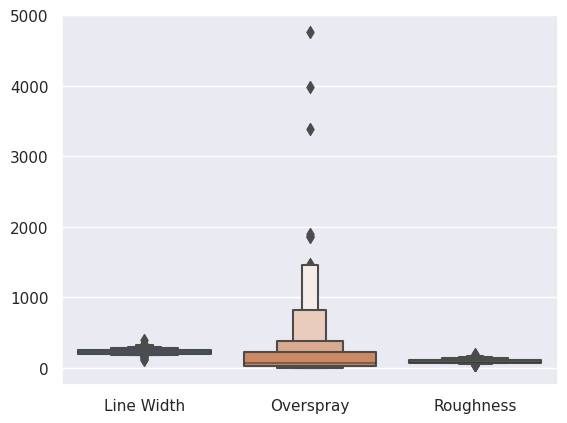

In [9]:
#plt.boxplot(Print_Database['Line Width','Overspray','Roughness'],widths=(0.2))
# Print_Database.boxplot(column=['Line Width','Overspray','Roughness'],widths=(0.5))
# plt.show()

sns.boxenplot(Print_Database[['Line Width','Overspray','Roughness']])
plt.show()

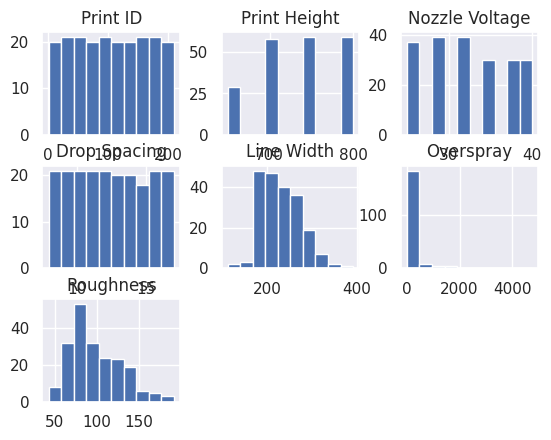

In [12]:
Print_Database.hist()

plt.hist(Print_Database['Line Width'])
plt.title('Line Width Histogram')
plt.show()

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


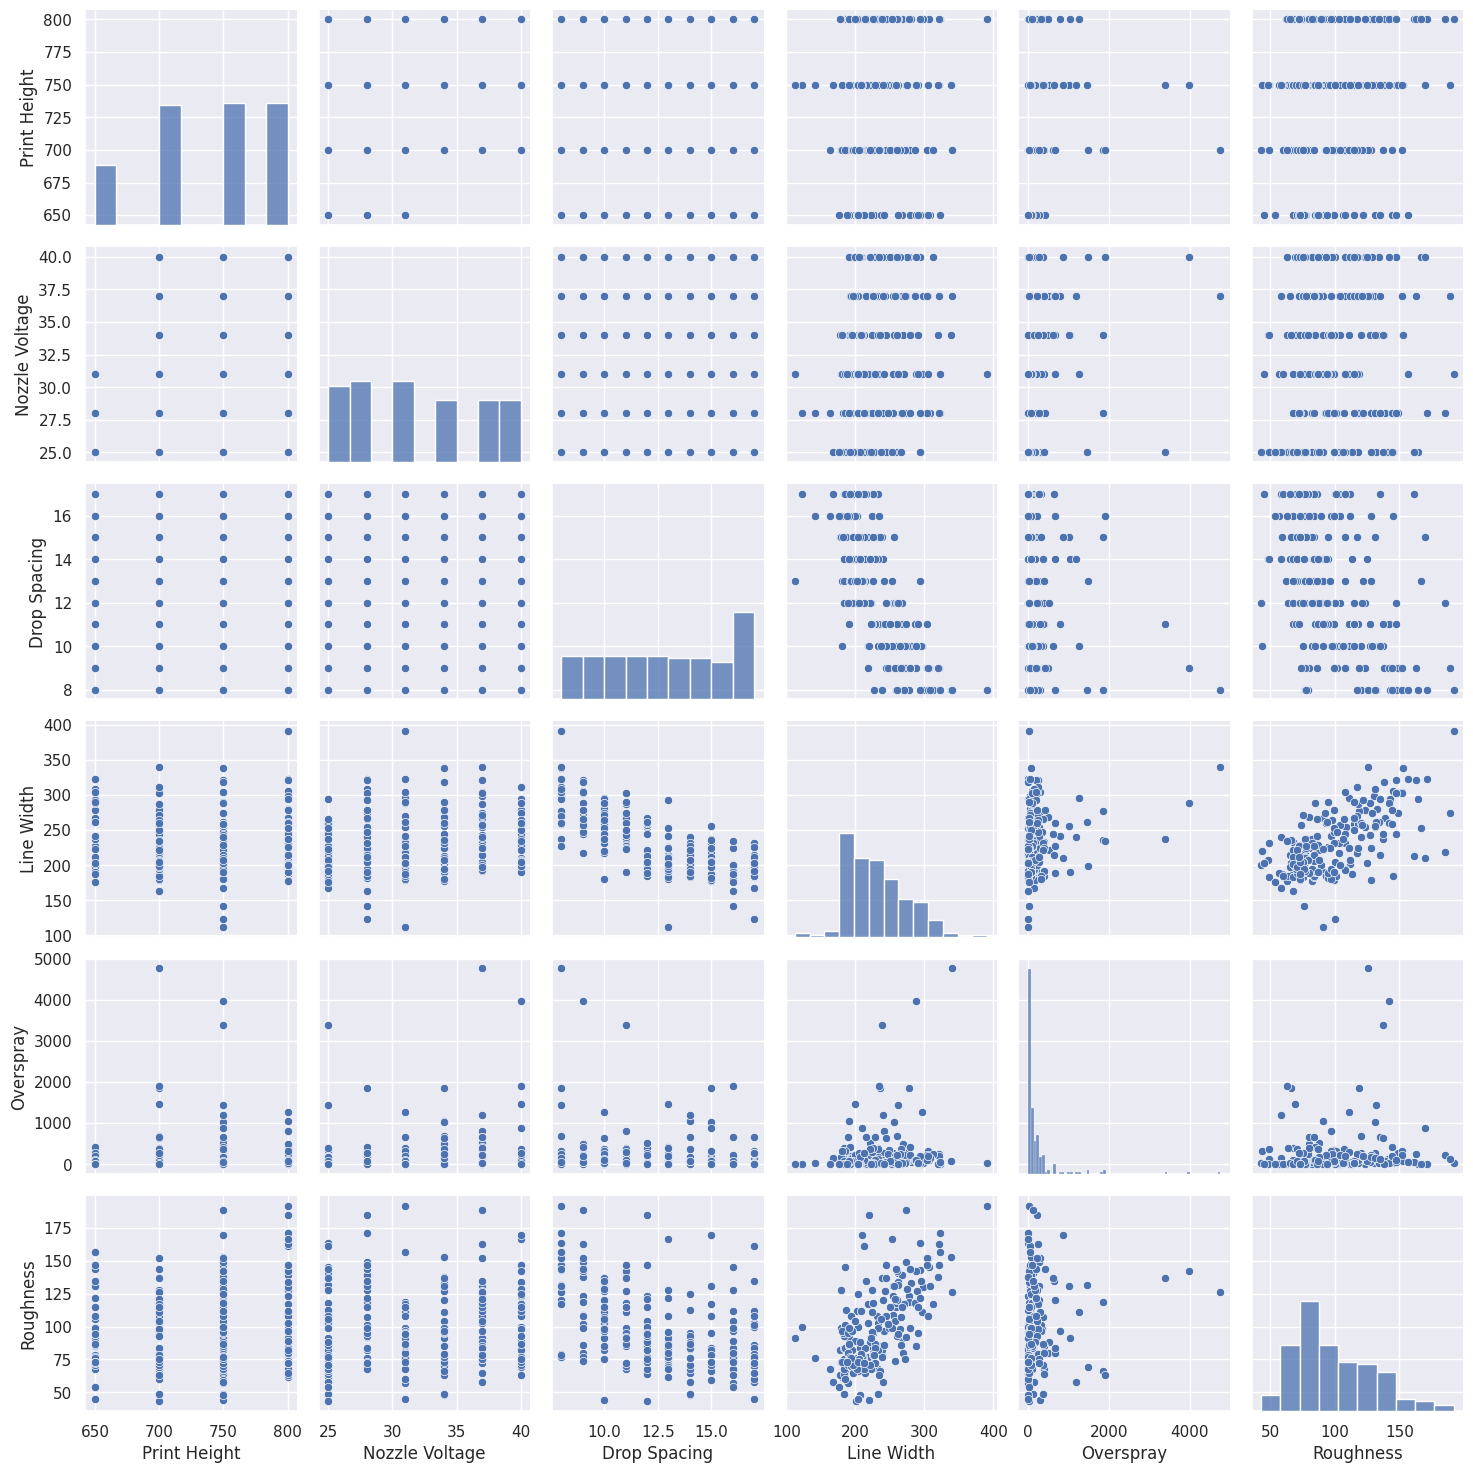

In [10]:
sns.pairplot(Print_Database[['Print Height', 'Nozzle Voltage', 'Drop Spacing', 'Line Width','Overspray','Roughness']],  size=2.5);

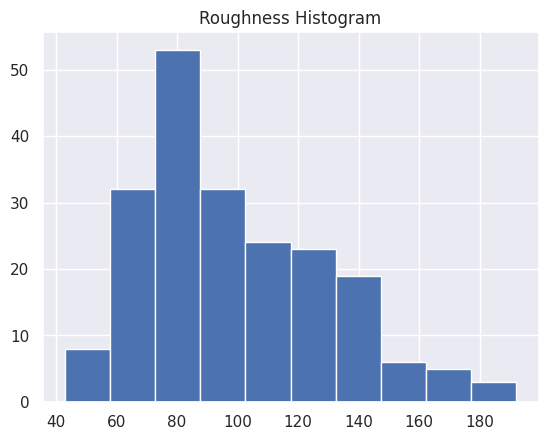

In [11]:
plt.hist(Print_Database['Roughness'])
plt.title('Roughness Histogram')
plt.show()

In [12]:
df_high_Overspray = Print_Database[Print_Database['Overspray'] > 500]

(array([8., 4., 2., 3., 0., 0., 1., 0., 1., 1.]),
 array([ 523. ,  946.9, 1370.8, 1794.7, 2218.6, 2642.5, 3066.4, 3490.3,
        3914.2, 4338.1, 4762. ]),
 <BarContainer object of 10 artists>)

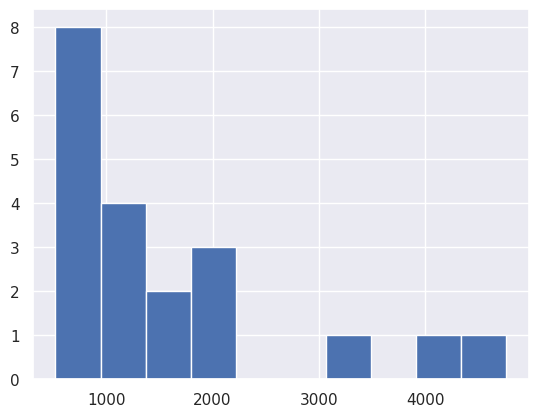

In [13]:
plt.hist(df_high_Overspray['Overspray'])

In [14]:
DB_modified_Overspray = Print_Database.drop(Print_Database.index[Print_Database['Overspray'] >450])
DB_modified_Overspray

,Print ID,Print Height,Nozzle Voltage,Drop Spacing,Line Width,Overspray,Roughness
0,1,800,25,8,294,12,164
1,2,800,25,9,261,136,141
2,3,800,25,10,218,11,103
3,4,800,25,11,190,15,68
4,5,800,25,12,190,91,90
...,...,...,...,...,...,...,...
200,205,650,31,12,262,17,94
201,206,650,31,13,241,15,86
202,207,650,31,14,191,77,87
203,209,650,31,16,188,1,73


(array([74., 34., 20., 10.,  9., 12.,  9.,  6.,  5.,  5.]),
 array([  0. ,  41.5,  83. , 124.5, 166. , 207.5, 249. , 290.5, 332. ,
        373.5, 415. ]),
 <BarContainer object of 10 artists>)

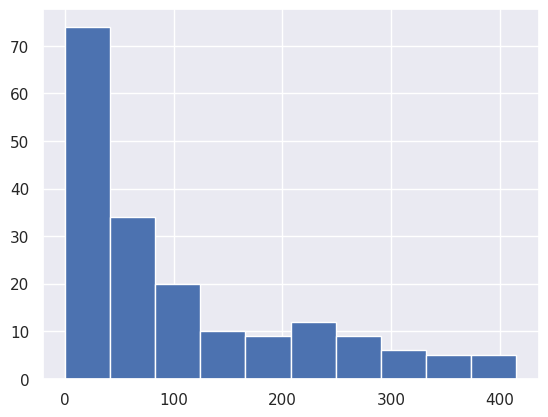

In [15]:
plt.hist(DB_modified_Overspray['Overspray'])

## Normalization and Train Test Split

In [12]:
# Set features, targets
from sklearn.model_selection import train_test_split
features = Print_Database[['Print Height','Nozzle Voltage','Drop Spacing']]
target = Print_Database[['Line Width','Overspray','Roughness']]

# set test and train
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.2 ,random_state=42)

# Feature normalization 
# Here we normalized in a way that all features have the mean zero and standard deviation one 
x_train_std = x_train.std()
x_train_mean = x_train.mean()

x_train_normalized = pd.DataFrame()
for column in range (0,len(x_train.columns)): 
    x_train_normalized[x_train.columns[column]] = (x_train.iloc[:,column]-x_train_mean[column])/x_train_std[column]

    
x_test_normalized = pd.DataFrame()
for column in range (0,len(x_test.columns)): 
    x_test_normalized[x_test.columns[column]] = (x_test.iloc[:,column]-x_train_mean[column])/x_train_std[column]



In [13]:
len(Print_Database[['Print Height','Nozzle Voltage','Drop Spacing']])

205

## ML Algos

### Line width

 This problem is unconstrained.
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.75838D+04    |proj g|=  2.30680D+02

At iterate    1    f=  1.61511D+03    |proj g|=  4.10587D+02

At iterate    2    f=  1.01723D+03    |proj g|=  2.73171D+02

At iterate    3    f=  4.73056D+02    |proj g|=  6.71539D+01

At iterate    4    f=  4.07984D+02    |proj g|=  3.87928D+01

At iterate    5    f=  3.93884D+02    |proj g|=  2.90313D+01

At iterate    6    f=  3.79143D+02    |proj g|=  3.04053D+01

At iterate    7    f=  3.68758D+02    |proj g|=  2.92714D+01

At iterate    8    f=  3.59564D+02    |proj g|=  1.98716D+01

At iterate    9    f=  3.50952D+02    |proj g|=  1.16829D+01

At iterate   10    f=  3.47961D+02    |proj g|=  8.72198D+00

At iterate   11    f=  3.41311D+02    |proj g|=  1.50338D+01

At iterate   12    f=  3.36498D+02    |proj g|=  9.17331D+00

At iterate   13    f=  3.3

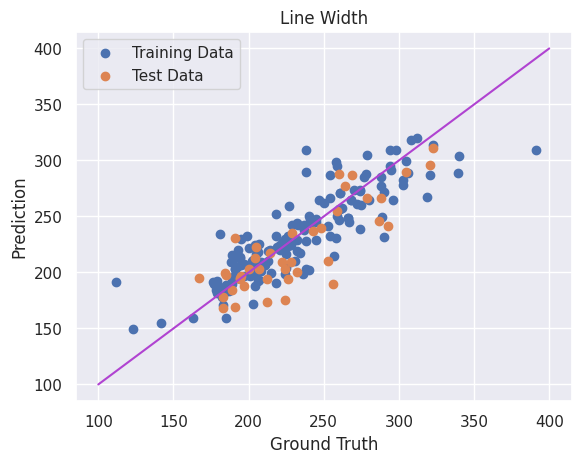

In [17]:
# Here we define ML model

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math 

mlp_reg = MLPRegressor(activation ='relu',
                        hidden_layer_sizes = (30),
                        alpha = 0.01,
                        learning_rate_init = 0.0001,
                        solver = 'lbfgs',
                        verbose= True,
                        max_iter =500, 
                      random_state=42)

mlp_reg.fit(x_train_normalized, y_train['Line Width'])

y_pred_train = mlp_reg.predict(x_train_normalized)
plt.scatter(y_train['Line Width'], y_pred_train, label='Training Data')
R2_train = r2_score(y_train['Line Width'],y_pred_train)
print('R2_train =', R2_train)
RSME_train = math.sqrt(mean_squared_error(y_train['Line Width'],y_pred_train))
print('RSME_train = ',RSME_train)

y_pred_test = mlp_reg.predict(x_test_normalized)
plt.scatter(y_test['Line Width'], y_pred_test,label='Test Data')
R2_test = r2_score(y_test['Line Width'],y_pred_test)
print('R2_test =', R2_test)
RSME_test = math.sqrt(mean_squared_error(y_test['Line Width'],y_pred_test))
print('RSME_test = ',RSME_test)

x = [100,400]
y = [100,400]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Line Width')
plt.legend()
plt.show()

### Roughness

 This problem is unconstrained.
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53564D+03    |proj g|=  1.00472D+02

At iterate    1    f=  5.68548D+02    |proj g|=  1.00005D+02

At iterate    2    f=  4.28299D+02    |proj g|=  5.29546D+01

At iterate    3    f=  3.66069D+02    |proj g|=  1.92566D+01

At iterate    4    f=  3.51744D+02    |proj g|=  1.03364D+01

At iterate    5    f=  3.46418D+02    |proj g|=  8.97185D+00

At iterate    6    f=  3.35787D+02    |proj g|=  1.36492D+01

At iterate    7    f=  3.28954D+02    |proj g|=  6.98120D+00

At iterate    8    f=  3.24978D+02    |proj g|=  5.05119D+00

At iterate    9    f=  3.23267D+02    |proj g|=  4.63493D+00

At iterate   10    f=  3.20654D+02    |proj g|=  4.08199D+00

At iterate   11    f=  3.16831D+02    |proj g|=  6.99075D+00

At iterate   12    f=  3.14098D+02    |proj g|=  9.30902D+00

At iterate   13    f=  3.1

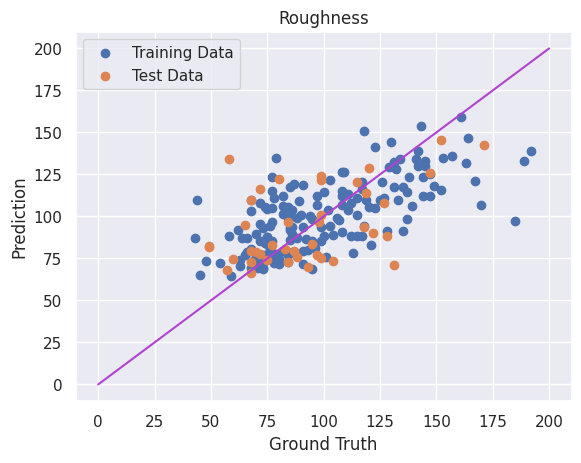

In [16]:
mlp_reg.fit(x_train_normalized, y_train['Roughness'])

y_pred_train = mlp_reg.predict(x_train_normalized)
plt.scatter(y_train['Roughness'], y_pred_train,label='Training Data')
R2_train = r2_score(y_train['Roughness'],y_pred_train)
print('R2_train =', R2_train)
RSME_train = math.sqrt(mean_squared_error(y_train['Roughness'],y_pred_train))
print('RSME_train = ',RSME_train)


y_pred_test = mlp_reg.predict(x_test_normalized)
plt.scatter(y_test['Roughness'], y_pred_test, label='Test Data')
R2_test = r2_score(y_test['Roughness'],y_pred_test)
print('R2_test =', R2_test)
RSME_test = math.sqrt(mean_squared_error(y_test['Roughness'],y_pred_test))
print('RSME_test = ',RSME_test)

x = [0,200]
y = [0,200]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Roughness')
plt.legend()
plt.show()

### Overspray Outlier treatment and normalization

In [20]:
DB_modified_Overspray = Print_Database.drop(Print_Database.index[Print_Database['Overspray'] >450])

# Set features, target
from sklearn.model_selection import train_test_split
features = DB_modified_Overspray[['Print Height','Nozzle Voltage','Drop Spacing']]
target = DB_modified_Overspray[['Line Width','Overspray','Roughness']]

# set test and train
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(features,target, test_size=0.2 ,random_state=r_seed)

# Normalization 
x_train_os_std = x_train_os.std()
x_train_os_mean = x_train_os.mean()
x_train_os_normalized = pd.DataFrame()
for column in range (0,len(x_train_os.columns)): # This section reads each column of the input file and calculates the RMS
    x_train_os_normalized[x_train_os.columns[column]] = (x_train_os.iloc[:,column]-x_train_os_mean[column])/x_train_os_std[column]

    

x_test_os_normalized = pd.DataFrame()
for column in range (0,len(x_test_os.columns)): # This section reads each column of the input file and calculates the RMS
    x_test_os_normalized[x_test_os.columns[column]] = (x_test_os.iloc[:,column]-x_train_os_mean[column])/x_train_os_std[column]

  

In [21]:
print(len(Print_Database), len(DB_modified_Overspray))
print(len(x_train_os), len(x_test_os))

205 184
147 37


### Overspray Predict

 This problem is unconstrained.
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22627D+04    |proj g|=  1.06505D+02

At iterate    1    f=  6.32894D+03    |proj g|=  1.54980D+02

At iterate    2    f=  6.15400D+03    |proj g|=  9.58116D+01

At iterate    3    f=  6.02858D+03    |proj g|=  8.62989D+01

At iterate    4    f=  5.95993D+03    |proj g|=  8.19806D+01

At iterate    5    f=  5.94622D+03    |proj g|=  4.75771D+01

At iterate    6    f=  5.90214D+03    |proj g|=  5.16451D+01

At iterate    7    f=  5.88732D+03    |proj g|=  5.94450D+01

At iterate    8    f=  5.85958D+03    |proj g|=  3.63510D+01

At iterate    9    f=  5.78299D+03    |proj g|=  3.23519D+01

At iterate   10    f=  5.73969D+03    |proj g|=  4.01116D+01

At iterate   11    f=  5.69498D+03    |proj g|=  4.03960D+01

At iterate   12    f=  5.62674D+03    |proj g|=  1.87219D+01

At iterate   13    f=  5.6

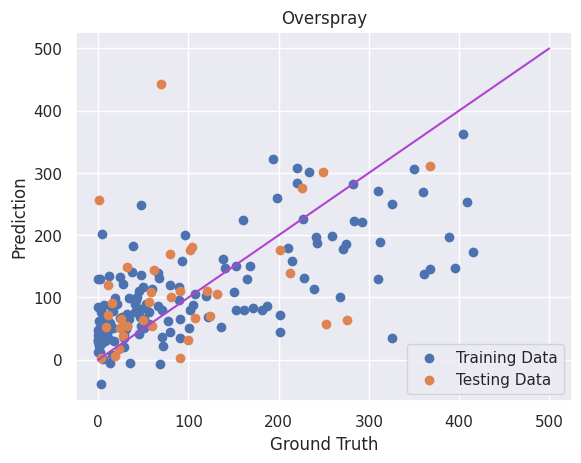

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
# instantiate a neural network 
# lbfgs optimizer used to train the neural network- converges well for small data

'''
mlp_reg = MLPRegressor(activation ='relu',
                        hidden_layer_sizes = (30),
                        alpha = 0.01,
                        learning_rate_init = 0.0001,
                        solver = 'lbfgs',
                        verbose= True,
                        max_iter =500, 
                      random_state=r_seed)
'''
mlp_reg.fit(x_train_os_normalized, y_train_os['Overspray'])


y_pred_train_os = mlp_reg.predict(x_train_os_normalized)
plt.scatter(y_train_os['Overspray'], y_pred_train_os, label='Training Data')
R2_train_os = r2_score(y_train_os['Overspray'],y_pred_train_os)
print('R2_train =', R2_train_os)
RSME_train_os = math.sqrt(mean_squared_error(y_train_os['Overspray'],y_pred_train_os))
print('RSME_train = ',RSME_train)


y_pred_test_os = mlp_reg.predict(x_test_os_normalized)
plt.scatter(y_test_os['Overspray'], y_pred_test_os, label='Testing Data')
R2_test_os = r2_score(y_test_os['Overspray'],y_pred_test_os)
print('R2_test =', R2_test_os)
RSME_test_os = math.sqrt(mean_squared_error(y_test_os['Overspray'],y_pred_test_os))
print('RSME_test = ',RSME_test_os)

x = [0,500]
y = [0,500]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Overspray')
plt.legend()
plt.show()

## Local library import
We import all the required local libraries libraries

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import

In [24]:
loc_feature = r'../../data/processed/microscopic_imgs/cropped_clean/db/Print_Database_ML.csv'
df_original= pd.read_csv(loc_feature,index_col=[0])

In [25]:
df_original

,Print ID,Print Height,Nozzle Voltage,Drop Spacing,Line Width,Overspray,Roughness
0,1,800,25,8,294,12,164
1,2,800,25,9,261,136,141
2,3,800,25,10,218,11,103
3,4,800,25,11,190,15,68
4,5,800,25,12,190,91,90
...,...,...,...,...,...,...,...
200,205,650,31,12,262,17,94
201,206,650,31,13,241,15,86
202,207,650,31,14,191,77,87
203,209,650,31,16,188,1,73


In [26]:
df_original.columns

Index(['Print ID', 'Print Height', 'Nozzle Voltage', 'Drop Spacing',
       'Line Width', 'Overspray', 'Roughness'],
      dtype='object')

In [27]:
df_original.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True)


x_train_normalized.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True)
x_test_normalized.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True), 
y_train.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True)
y_test.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True)

In [28]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id_print        205 non-null    int64
 1   height_print    205 non-null    int64
 2   voltage_nozzle  205 non-null    int64
 3   spacing_drop    205 non-null    int64
 4   width_line      205 non-null    int64
 5   overspray       205 non-null    int64
 6   roughness       205 non-null    int64
dtypes: int64(7)
memory usage: 12.8 KB


# EDA

<AxesSubplot:>

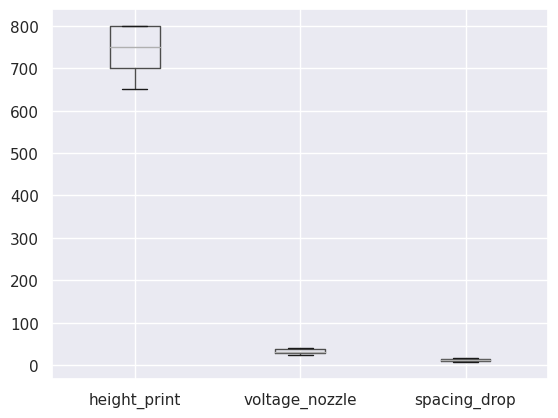

In [29]:
df_original.boxplot(column=['height_print','voltage_nozzle','spacing_drop'])

In [30]:
columns_features =['height_print','voltage_nozzle','spacing_drop']
columns_target = ['width_line', 'overspray', 'roughness']

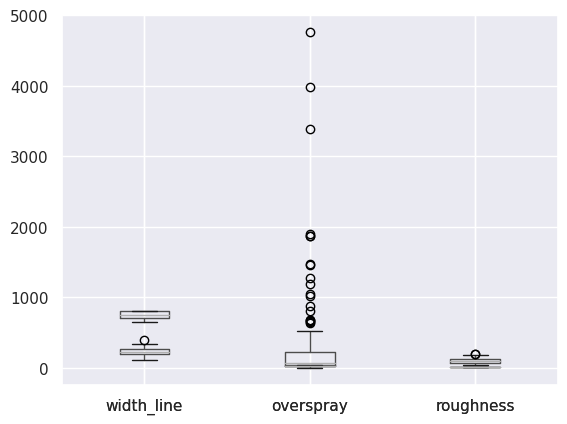

In [31]:
plot_box_df_features = df_original.boxplot(column=columns_features)

plot_box_df_outputs = df_original.boxplot(column=columns_target)

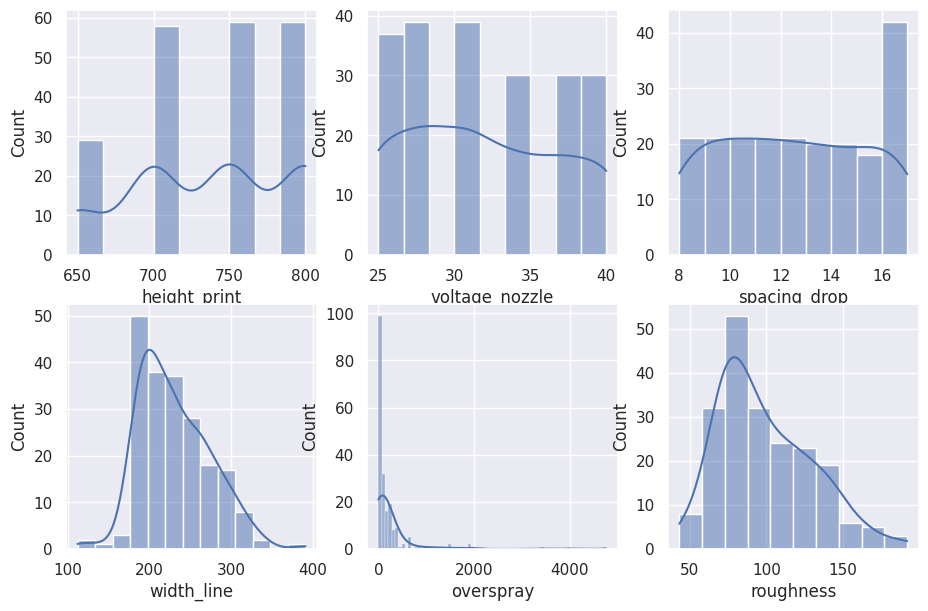

In [32]:
import matplotlib.pyplot as plt
# Define the number of rows and columns you want
n_rows=2
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(11,7))

for i, column in enumerate(columns_features+columns_target):
    sns.histplot(df_original[column],ax=axes[i//n_cols,i%n_cols], kde = True)

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


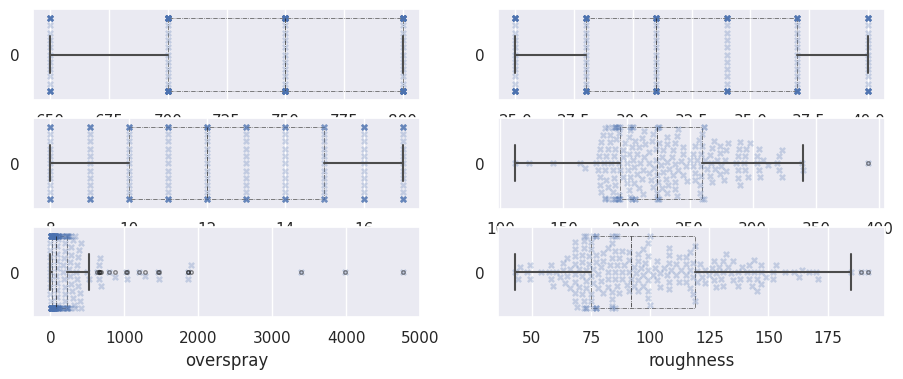

In [33]:
import matplotlib.pyplot as plt
# Define the number of rows and columns you want
n_rows=3
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(11,4))
flierprops = dict(marker='.', markerfacecolor='none', markersize=5, markeredgecolor='k', alpha = 0.5)
medianprops = dict(linestyle='-.', linewidth=0.5, color='k')
boxprops=dict(linestyle='-.', linewidth=0.5, facecolor='none')#%colorsacecolor':'None', 'linewidth' : 0.5, 'color':'r'}
for i, column in enumerate(columns_features+columns_target):
    sns.boxplot(df_original[column],ax=axes[i//n_cols,i%n_cols], orient = 'h', boxprops=boxprops, 
                medianprops= medianprops, zorder=10, flierprops=flierprops)
    sns.swarmplot(df_original[column],ax=axes[i//n_cols,i%n_cols], orient = 'h', size=5, marker="X",alpha=.25)

## Corelations

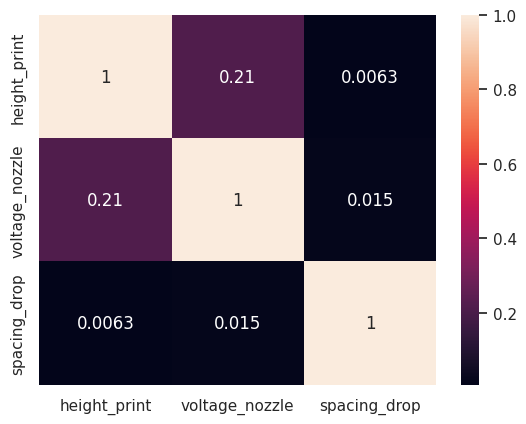

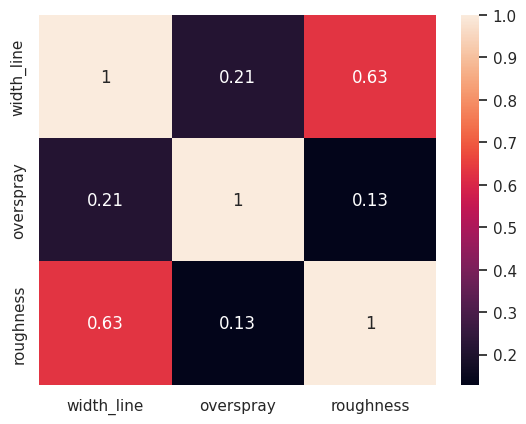

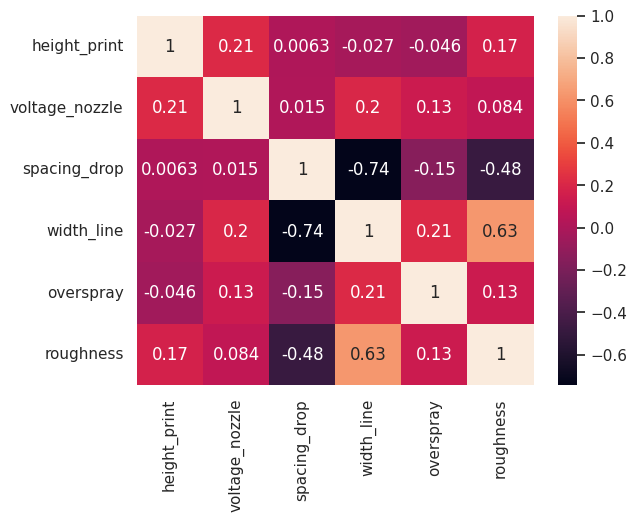

In [34]:
corrMatrix = df_original[columns_features].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df_original[columns_target].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df_original[columns_features+columns_target].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

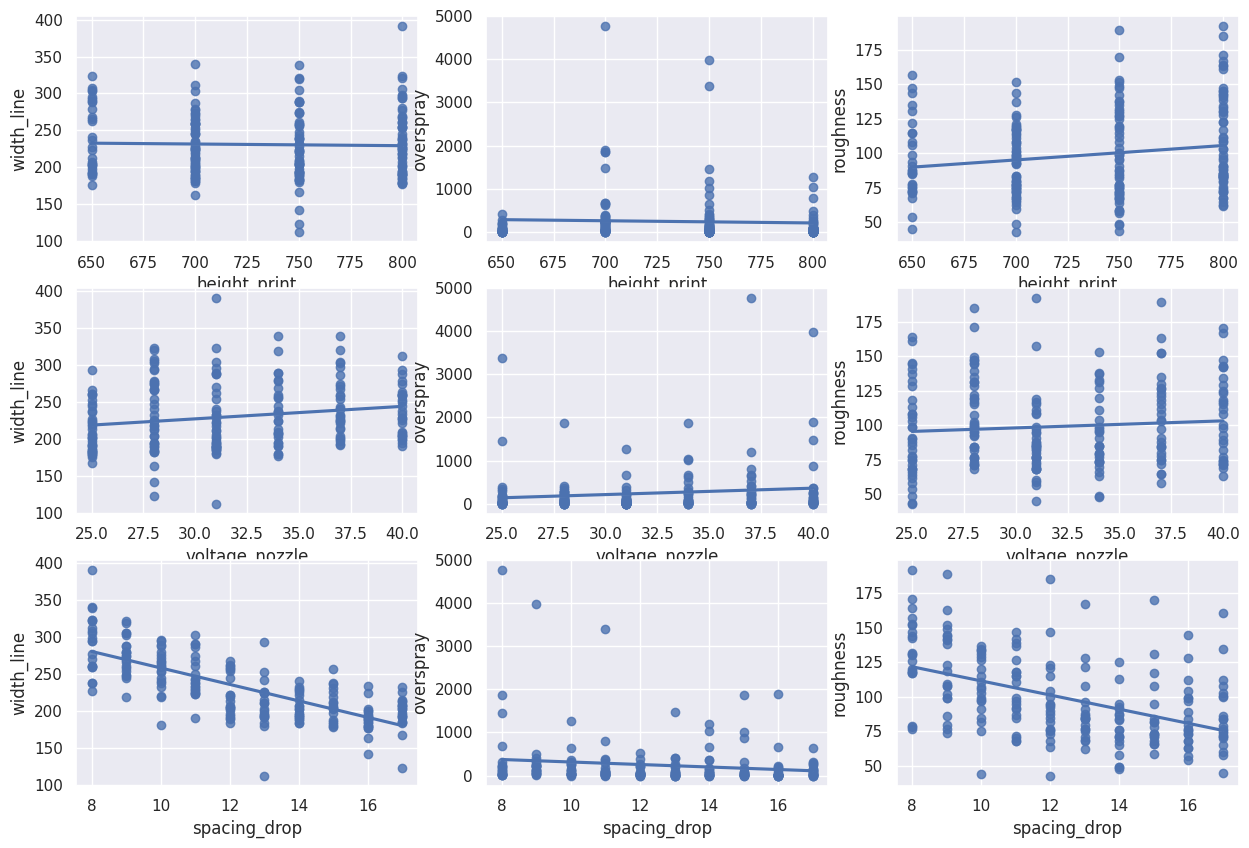

In [35]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
row = col = 0
for indx_col,feature_col in enumerate(columns_features):
#     if (indx_col%3 == 0) & (indx_col > 0):
#         row += 1
#         col = 0
    for indx_target, target_col in enumerate(columns_target):
        sns.regplot(x=feature_col,y=target_col,data=df_original,ax=ax[row,col],ci=False)
        col += 1
        if (col%3 == 0) & (col > 0):
            row += 1
            col = 0        
        

# Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

## Outlier Treatment

## Normalization, Standerdization

# Prediction Algos

In [36]:
def highlight_rows_rmse(row, asking_value):
    cur_value = row.loc['RMSE']
    if cur_value < asking_value:
        color = '#4808c9'
        font_weight = 'normal'
    elif cur_value == asking_value:
        color = '#BAFFC9' 
        font_weight = 'normal'
    else:
        color = '#222222' 
        font_weight = 'normal'
    return [f'color: {color}; font-weight: {font_weight}' for r in row]

## Line width

R2_train = 0.7631930794208385

RSME_train =  21.44942675039149

R2_test = 0.6359015508438468

RSME_test =  24.502041581763386

`paper` : 23.7

In [37]:
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train['width_line'], y_test['width_line'])

models.reset_index(drop = False, inplace = True)

100%|██████████| 42/42 [00:02<00:00, 14.27it/s]


In [38]:
HTML(models[['Model','Adjusted R-Squared', 'R-Squared', 'RMSE']].style.apply(lambda x: highlight_rows_rmse(x, 24.50),axis=1).to_html())

,Model,Adjusted R-Squared,R-Squared,RMSE
0,BaggingRegressor,0.665906,0.690963,22.573463
1,Lasso,0.624713,0.652860,23.924641
2,PoissonRegressor,0.624413,0.652582,23.934220
3,LGBMRegressor,0.621479,0.649868,24.027500
4,HistGradientBoostingRegressor,0.621479,0.649868,24.027500
5,ElasticNetCV,0.620909,0.649341,24.045590
6,BayesianRidge,0.618056,0.646702,24.135889
7,Ridge,0.616996,0.645722,24.169361
8,RidgeCV,0.616996,0.645722,24.169361
9,LassoCV,0.616296,0.645073,24.191462


## Roughness

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
R2_train = 0.4661703381670843

RSME_train =  22.759895306737544

R2_test = 0.1668281136369445

RSME_test =  25.982118043893102

`paper` :  19.4

In [39]:
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train['roughness'], y_test['roughness'])
models.reset_index(drop = False, inplace = True)

100%|██████████| 42/42 [00:01<00:00, 38.17it/s]


In [40]:
HTML(models[['Model','Adjusted R-Squared', 'R-Squared', 'RMSE']].style.apply(lambda x: highlight_rows_rmse(x, 25.98),axis=1).to_html())

,Model,Adjusted R-Squared,R-Squared,RMSE
0,LGBMRegressor,0.383016,0.429290,21.503797
1,HistGradientBoostingRegressor,0.383016,0.429290,21.503797
2,BaggingRegressor,0.350972,0.399649,22.055136
3,OrthogonalMatchingPursuit,0.318119,0.369260,22.606448
4,HuberRegressor,0.305981,0.358033,22.806766
5,PassiveAggressiveRegressor,0.301496,0.353884,22.880344
6,PoissonRegressor,0.300302,0.352780,22.899885
7,LassoCV,0.277561,0.331744,23.269052
8,LarsCV,0.277512,0.331699,23.269840
9,LassoLarsCV,0.277512,0.331699,23.269840


## Overspray

R2_train = 0.475805274317867

RSME_train =  22.759895306737544

R2_test = -0.3540476835932973

RSME_test =  102.78647489238195

`paper` : 67/129

In [41]:
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_os_normalized, x_test_os_normalized, y_train_os['Overspray'], y_test_os['Overspray'])
models.reset_index(drop = False, inplace = True)

 36%|███▌      | 15/42 [00:00<00:00, 47.00it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████| 42/42 [00:01<00:00, 38.18it/s]


In [42]:
HTML(models[['Model','Adjusted R-Squared', 'R-Squared', 'RMSE']].style.apply(lambda x: highlight_rows_rmse(x, 102.78),axis=1).to_html())

,Model,Adjusted R-Squared,R-Squared,RMSE
0,NuSVR,-0.078923,0.010988,87.845565
1,LGBMRegressor,-0.096644,-0.005257,88.564070
2,HistGradientBoostingRegressor,-0.096644,-0.005257,88.564070
3,TweedieRegressor,-0.105742,-0.013596,88.930662
4,DummyRegressor,-0.110447,-0.017910,89.119686
5,ElasticNetCV,-0.113340,-0.020561,89.235689
6,ElasticNet,-0.118597,-0.025380,89.446107
7,LassoLars,-0.124876,-0.031137,89.696833
8,BayesianRidge,-0.131091,-0.036834,89.944273
9,KNeighborsRegressor,-0.138784,-0.043885,90.249612


#  Interpretation

## PDP

### Generalized additive models
- https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html

In [51]:
from pygam import LinearGAM, LogisticGAM

100% (205 of 205) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

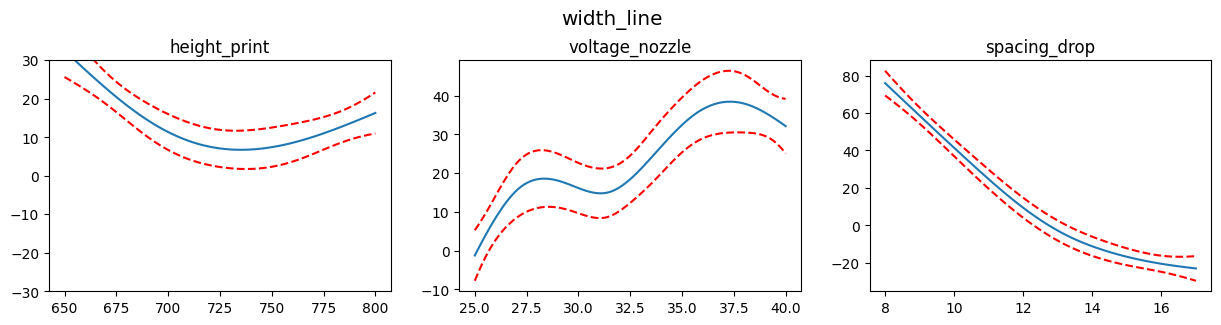

In [80]:
target_to_analyze = 'width_line'

lams = np.random.rand(len(df_features), 3)
lams = lams * 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=10).gridsearch(df_features[columns_features].values, df_features[target_to_analyze].values, lam=lams)


titles = columns_features#redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))
st = fig.suptitle(target_to_analyze, fontsize='x-large')

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
st.set_y(1.05)
plt.show()

100% (205 of 205) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

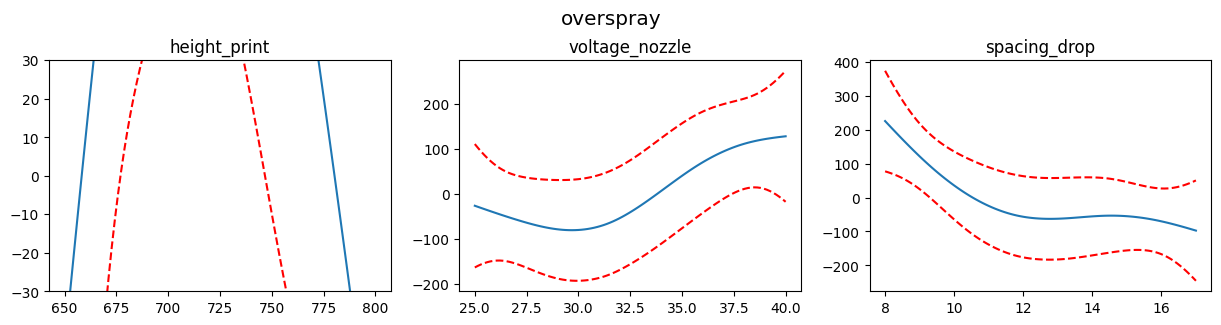

In [81]:
target_to_analyze = 'overspray'

lams = np.random.rand(len(df_features), 3)
lams = lams * 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=10).gridsearch(df_features[columns_features].values, df_features[target_to_analyze].values, lam=lams)


titles = columns_features#redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))
st = fig.suptitle(target_to_analyze, fontsize='x-large')

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
st.set_y(1.05)
plt.show()

100% (205 of 205) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

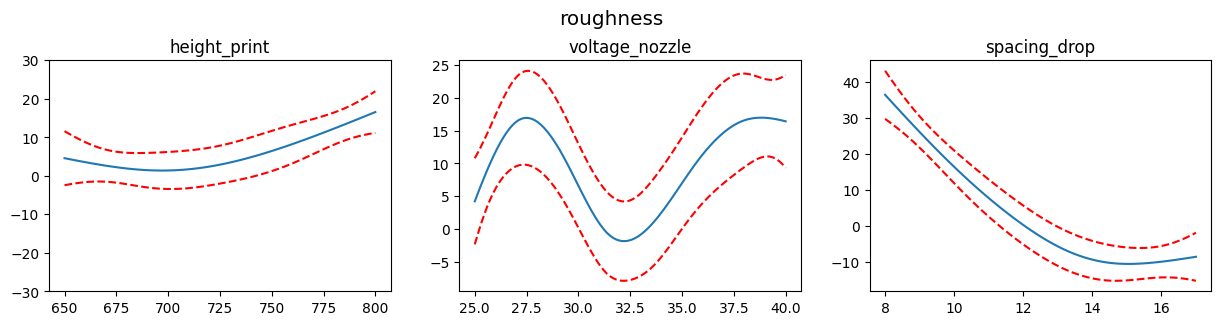

In [82]:
target_to_analyze = 'roughness'

lams = np.random.rand(len(df_features), 3)
lams = lams * 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=10).gridsearch(df_features[columns_features].values, df_features[target_to_analyze].values, lam=lams)


titles = columns_features#redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))
st = fig.suptitle(target_to_analyze, fontsize='x-large')

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
st.set_y(1.05)
plt.show()

### sklearn :: mlp

In [116]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler#MinMaxScaler#StandardScaler
from sklearn.neural_network import MLPRegressor

In [129]:
target_to_analyze = 'width_line'

est = make_pipeline(
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes=( 70, 30),
        learning_rate_init=0.01,
        solver='adam',
        early_stopping=False,
        random_state=r_seed,
    ),
)
est.fit(df_features[columns_features], df_features[target_to_analyze])

print(f"Test R2 score: {est.score(df_features[columns_features], df_features[target_to_analyze]):.2f}")

Test R2 score: 0.67


<Figure size 640x480 with 0 Axes>

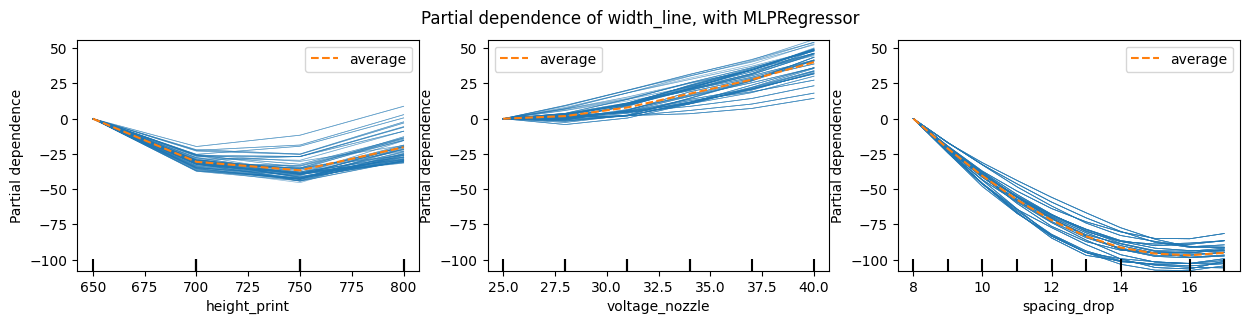

In [142]:
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 200,
    "n_jobs": 2,
    "grid_resolution": 40,
    "centered": True,
    "random_state": r_seed,
}

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))

display = PartialDependenceDisplay.from_estimator(
    est,
    df_features[columns_features],
    features=columns_features,
    kind="both",
    **common_params,ax = axs
)

display.figure_.suptitle(f'Partial dependence of {target_to_analyze}, with MLPRegressor')
display.figure_.subplots_adjust(hspace=0.3)

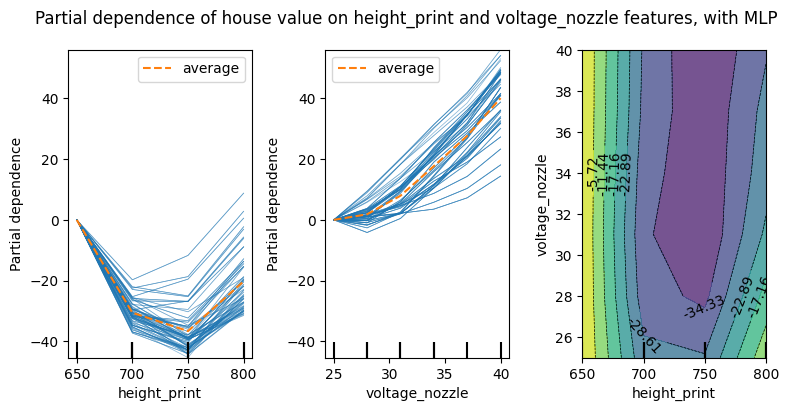

In [146]:
_, ax = plt.subplots(ncols=3, figsize=(9, 4))

# Note that we could have called the method `from_estimator` three times and
# provide one feature, one kind of plot, and one axis for each call.
display = PartialDependenceDisplay.from_estimator(
    est,
    df_features[columns_features],
    features=["height_print", "voltage_nozzle", ("height_print", "voltage_nozzle")],
    kind=["both", "both", "average"],
    ax=ax,
    **common_params,
)

display.figure_.suptitle(
    f"Partial dependence of house value on height_print and voltage_nozzle features, with MLP"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)


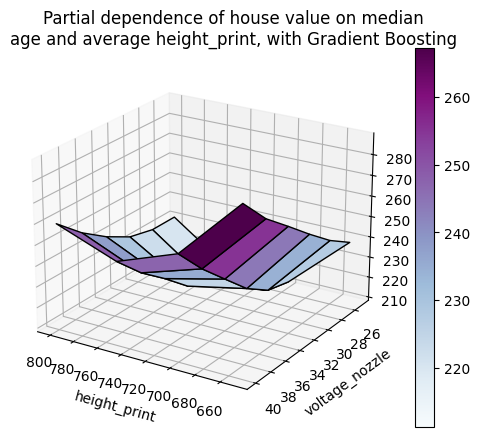

In [148]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.inspection import partial_dependence

fig = plt.figure()

features = ("height_print", "voltage_nozzle")
pdp = partial_dependence(
    est, df_features[columns_features], features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel("Partial dependence")
# pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle(
    "Partial dependence of house value on median\n"
    "age and average height_print, with Gradient Boosting"
)
plt.subplots_adjust(top=0.9)
plt.show()


### SHAP

  0%|          | 0/37 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

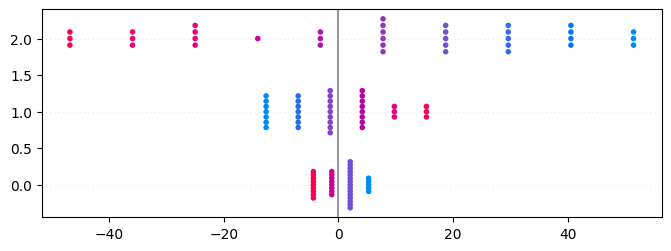

In [294]:
from sklearn import linear_model
import shap

lin_regr = linear_model.LinearRegression()
lin_regr.fit(x_train_normalized.values, y_train['width_line'].values)

## Explaining all the instances
x_train_normalized_summary = shap.kmeans(x_train_normalized, 10)
ex = shap.KernelExplainer(lin_regr.predict, x_train_normalized_summary)

shap_values = ex.shap_values(x_test_normalized)
shap.summary_plot(shap_values, x_test_normalized, show=False)
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

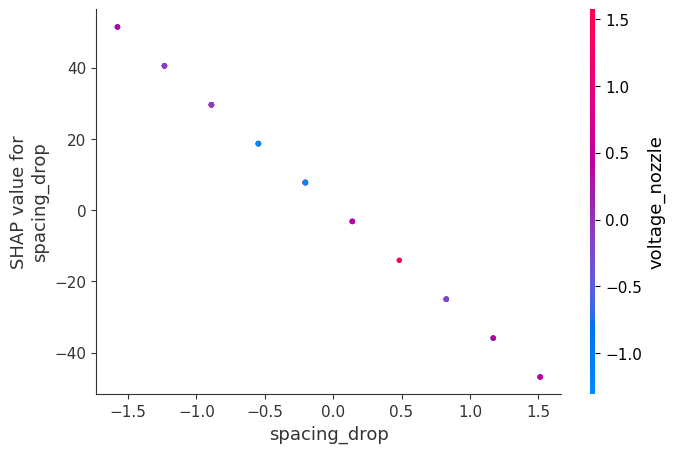

In [303]:
shap.dependence_plot("spacing_drop", shap_values, x_test_normalized)

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2

In [305]:
!/home/computeruser/anaconda3/envs/atomic/bin/pip install lazypredict

  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-1.0.5.tar.gz (5.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... |^C
anceled
ERROR: Operation cancelled by user


In [289]:
import matplotlib
matplotlib.__version__

'3.6.0'

In [25]:
pd.DataFrame([{'ml_algo':1, 'train_acc':2}, {'ml_algo': 100, 'train_acc':200}])

,ml_algo,train_acc
0,1,2
1,100,200


In [44]:
!/home/computeruser/anaconda3/envs/atomic/bin/pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.0
    Uninstalling joblib-1.0.0:
      Successfully uninstalled joblib-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires joblib==1.0.0, but you have joblib 1.2.0 which is incompatible.
lazypredict 0.2.9 requires PyYAML==5.4, but you have pyyaml 6.0 which is incompatible.
lazypredict 0.2.9 requires six==1.15.0, but you have six 1.16.0 which is incompatible.


In [49]:
# check version number
#Smooth
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(Print_Database[['Print Height','Nozzle Voltage','Drop Spacing']].add_suffixvalues, Print_Database['Overspray'])

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.